In [1]:
include("/Users/meesvandartel/Desktop/Projects/LPR projects/FinGrowthABM_repo/GrowthBanks.jl")
using .GrowthBanks,Agents,Plots,HypothesisTests,ProgressMeter

┌ Warning: Agent type is not concrete. If your agent is parametrically typed, you're probably
│ seeing this warning because you gave `Agent` instead of `Agent{Float64}`
│ (for example) to this function. You can also create an instance of your agent
│ and pass it to this function. If you want to use `Union` types for mixed agent
│ models, you can silence this warning.
│ If you are using `ContinuousAgent{D}` as agent type in version 6+, update
│ to the new two-parameter version `ContinuousAgent{D,Float64}` to obtain
│ the same behavior as previous Agents.jl versions.
└ @ Agents ~/.julia/packages/Agents/WuWeG/src/core/model_validation.jl:15
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


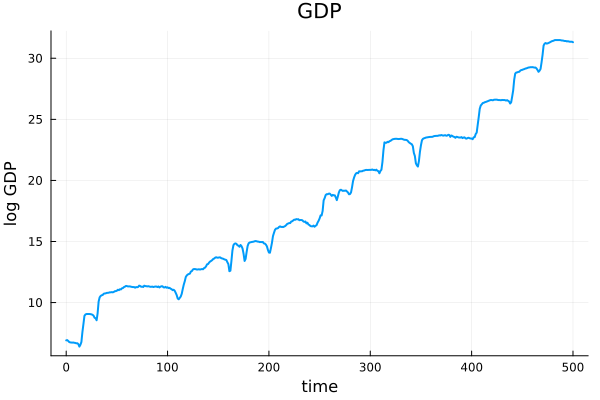

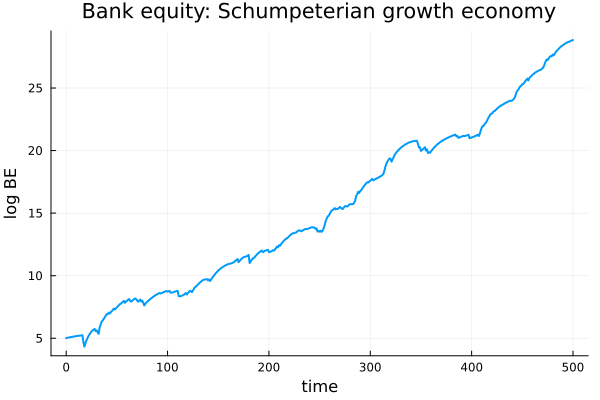

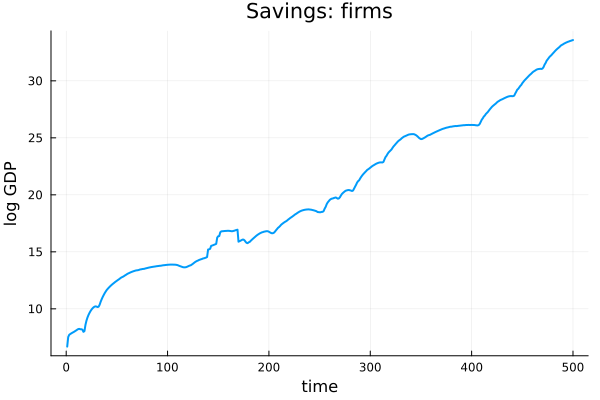

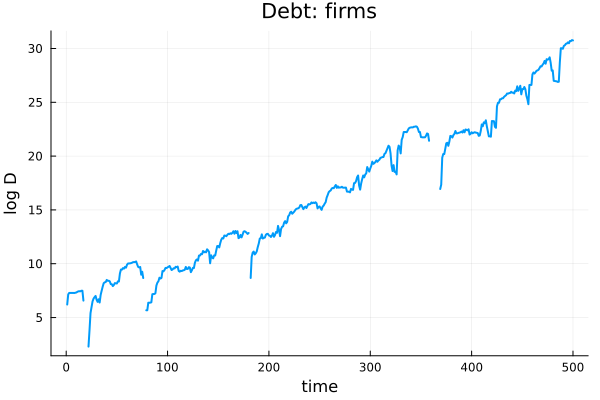

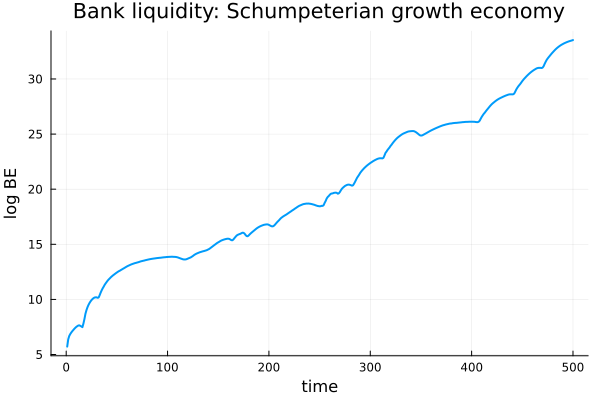

In [2]:
model1 = GrowthBanks.initialize_econ(;seed = 45)
GDP_series = []
S_series = []
D_series = []
banquity = []
L_series = []
dates = 0:500

@showprogress for t in dates

    GDP, Eq, D, L, bq = 0, 0, 0, 0, 0
    for agent in allagents(model1)
        if isa(agent, GrowthBanks.Firm)
            Q = agent.Q
            Eq += agent.S
            D += agent.D
            GDP += Q
        else
            bq += agent.equity
            L += agent.liquidity
        end
    end
    push!(GDP_series, log(GDP))
    push!(S_series, log(Eq))
    push!(D_series, log(D))
    
    push!(banquity, log(bq))
    push!(L_series, log(L))
    step!(model1)
end
GDP_series = convert(Vector{Float64}, GDP_series)
D_series = convert(Vector{Float64}, D_series)
S_series = convert(Vector{Float64}, S_series)
L_series = convert(Vector{Float64}, L_series)
banquity = convert(Vector{Float64}, banquity)

p = plot(dates, GDP_series,
    title="GDP", xlabel="time", ylabel="log GDP", linewidth=2, legend=false, grid=true)

p2 = plot(dates, S_series,
    title="Savings: firms", xlabel="time", ylabel="log GDP", linewidth=2, legend=false, grid=true)

p3 = plot(dates, D_series,
    title="Debt: firms", xlabel="time", ylabel="log D", linewidth=2, legend=false, grid=true)

p4 = plot(dates, banquity,
    title="Bank equity: Schumpeterian growth economy", xlabel="time", ylabel="log BE", linewidth=2, legend=false, grid=true)
p5 = plot(dates, L_series,
    title="Bank liquidity: Schumpeterian growth economy", xlabel="time", ylabel="log BE", linewidth=2, legend=false, grid=true)

# Display the plots
display(p)
display(p4)
display(p2)
display(p3)
display(p5)

In [3]:
ADFTest(GDP_series, :constant, 0)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          0.000212827

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.9706

Details:
    sample size in regression:          500
    number of lags:                     0
    ADF statistic:                      0.171268
    Critical values at 1%, 5%, and 10%: [-3.44347 -2.86733 -2.56985]
